In [33]:
import os
import urllib
from pathlib import Path

import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

In [2]:
def get_filename(url):
    if url.find("/"):
        return url.rsplit("/", 1)[1]

In [4]:
DATA_PATH = Path("../data")

In [3]:
url_list = ["https://github.com/Automating-GIS-processes/CSC18/raw/master/data/Helsinki_masked_p188r018_7t20020529_z34__LV-FIN.tif"]

In [10]:
for url in url_list:
    fname = get_filename(url)
    outfile = DATA_PATH / fname
    if not os.path.exists(outfile):
        print(f"Downloading {fname}")
        r = urllib.request.urlretrieve(url, outfile)

In [13]:
r[0]

WindowsPath('../data/Helsinki_masked_p188r018_7t20020529_z34__LV-FIN.tif')

In [8]:
import rasterio

In [14]:
raster = rasterio.open(r[0])

In [15]:
type(raster)

rasterio.io.DatasetReader

In [16]:
raster.crs

CRS.from_wkt('PROJCS["UTM Zone 0, Northern Hemisphere",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-183],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [17]:
raster.transform

Affine(28.5, 0.0, 698592.0,
       0.0, -28.5, 6697870.5)

In [18]:
raster.count

7

In [19]:
raster.driver

'GTiff'

In [20]:
raster.nodatavals

(None, None, None, None, None, None, None)

In [21]:
raster.meta

{'driver': 'GTiff',
 'dtype': 'uint8',
 'nodata': None,
 'width': 1288,
 'height': 1439,
 'count': 7,
 'crs': CRS.from_wkt('PROJCS["UTM Zone 0, Northern Hemisphere",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-183],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(28.5, 0.0, 698592.0,
        0.0, -28.5, 6697870.5)}

# Inspect various bands

In [22]:
band1 = raster.read(1)

In [23]:
type(band1)

numpy.ndarray

In [24]:
band1.dtype

dtype('uint8')

In [25]:
np.shape(band1)

(1439, 1288)

## Band statistics

In [27]:
bands = raster.read()

stats = []
for band in bands:
    stats.append({
        "min": band.min(),
        "mean": band.mean(),
        "median": np.median(band),
        "max": band.max()
    })

In [28]:
stats

[{'min': 0, 'mean': 59.63132232528628, 'median': 61.0, 'max': 255},
 {'min': 0, 'mean': 43.13342814842951, 'median': 43.0, 'max': 255},
 {'min': 0, 'mean': 36.29418775547201, 'median': 31.0, 'max': 255},
 {'min': 0, 'mean': 35.0946303937776, 'median': 13.0, 'max': 255},
 {'min': 0, 'mean': 37.63263502518571, 'median': 13.0, 'max': 255},
 {'min': 0, 'mean': 105.8221477777442, 'median': 114.0, 'max': 175},
 {'min': 0, 'mean': 26.28348760569581, 'median': 14.0, 'max': 255}]

# Visualizing raster layers

In [29]:
from rasterio.plot import show
%matplotlib inline

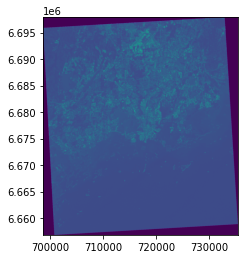

<AxesSubplot:>

In [30]:
show((raster, 1))

In [35]:
raster.count

7

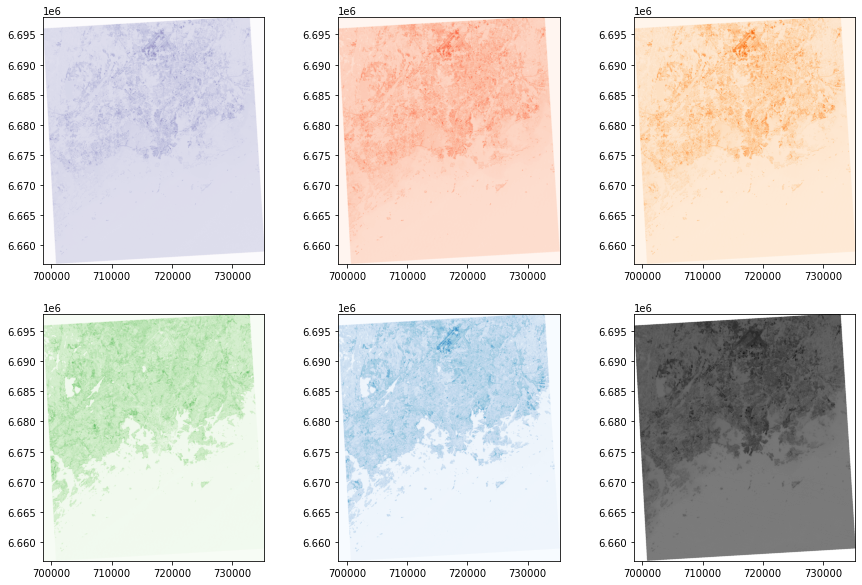

In [38]:
_, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()
cmaps = ["Purples", "Reds", "Oranges", "Greens", "Blues", "Greys"]

for i in range(1, raster.count):
    show((raster, i), cmap=cmaps[i-1], ax=axes[i-1])

# Mask/clip raster